In [2]:
import pandas as pd
import os
import warnings 
warnings.filterwarnings('ignore') # To supress warningsngs


In [11]:
import pandas as pd
import os
df_list = []
dirname = './data_100k_cars'
for dirname, _, filenames in os.walk(dirname):
    for filename in filenames:
        if not (filename.startswith("unclean") or filename==".DS_Store"):
            print(f"Processing: {filename}")
            df_tmp = pd.read_csv(os.path.join(dirname, filename)).drop_duplicates()
            df_tmp['manufacturer'] = filename.split(".")[0]
            df_list.append(df_tmp)
car_data = pd.concat(df_list, axis=0)
print(car_data.shape)
car_data.sample(15).T


car_data.head()

Processing: toyota.xls
Processing: skoda.xls
Processing: merc.xls
Processing: ford.xls
Processing: Toyota_vehicle_list.csv
Processing: vw.xls
Processing: Audi_vehicle_list.csv
Processing: bmw.xls
Processing: vauxhall.xls
Processing: hyundi.xls
Processing: list_of_models.csv
Processing: audi.xls
(98005, 23)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_model,...,Model.1,Model.2,Current generation,Current generation.1,Current generation.2,Vehicle description,Calendar year introduced,Current model,Current model.1,tax(£)
0,GT86,2016.0,16000.0,Manual,24089.0,Petrol,265.0,36.2,2.0,toyota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GT86,2017.0,15995.0,Manual,18615.0,Petrol,145.0,36.2,2.0,toyota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GT86,2015.0,13998.0,Manual,27469.0,Petrol,265.0,36.2,2.0,toyota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GT86,2017.0,18998.0,Manual,14736.0,Petrol,150.0,36.2,2.0,toyota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GT86,2017.0,17498.0,Manual,36284.0,Petrol,145.0,36.2,2.0,toyota,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import sqlite3
conn = sqlite3.connect("car_data.db")

cur = conn.cursor()


car_data.to_sql("car_data_tbl", conn, if_exists="replace")

pd.read_sql_query("select * from car_data_tbl;", conn)

cur.close()
conn.close()


In [ ]:
import sqlite3
conn = sqlite3.connect("car_data.db")

list_of_models = pd.read_sql_query('Select Distinct model from car_data_tbl', conn)
list_of_models

list_of_models.to_csv('./data_100k_cars/list_of_models.csv')

## Toyota Vehicle List (wikipedia)

In [1]:
## Import and Parse the Tables from Wikipedia with the Toyota information. 

import pandas as pd
import wikipedia 

# wikipedia.search("ford")

url = 'https://en.wikipedia.org/wiki/List_of_Toyota_vehicles'
Toyota_tables = pd.read_html(url)

# To access the first table:
Toyota_vehicles = Toyota_tables[0]
Toyota_vehicles.to_csv('./data_100k_cars/Toyota_vehicle_list.csv')
Toyota_vehicles.head()
# If you want to access another table, just index into the tables list:
second_table = tables[1]

['Ford Motor Company',
 'Ford',
 'Gerald Ford',
 'Harrison Ford',
 'Henry Ford',
 'Ford F-Series',
 'Ford Madox Ford',
 'Ford Mustang',
 'Francis Ford Coppola',
 'Ford v Ferrari']

### Audi Vehicle List (single file)

In [29]:
import pandas as pd

manufacturer = 'Ford'

url = f'https://en.wikipedia.org/wiki/List_of_{manufacturer}_vehicles'
vehicle_table = pd.read_html(url)

# To access the first table:
vehicles = vehicle_table[0]
vehicles.to_csv(f'./data_100k_cars/{manufacturer}_vehicle_list.csv')
vehicles.head()

Model                 Calendar year introduced   Current model  \
            Model         Model.1 Calendar year introduced    Introduction   
0       Hatchback       Hatchback                Hatchback       Hatchback   
1             NaN           Focus                     1998            2018   
2  Sedan/liftback  Sedan/liftback           Sedan/liftback  Sedan/liftback   
3             NaN          Escort                     1968            2015   
4             NaN           Focus                     1998            2018   

                                   \
  Update/facelift    Main markets   
0       Hatchback       Hatchback   
1            2021          Europe   
2  Sedan/liftback  Sedan/liftback   
3            2021           China   
4            2021           China   

                                 Vehicle description Unnamed: 7_level_0  
                                 Vehicle description Unnamed: 7_level_1  
0                                          Hatchback                NaN  
1  C-segment / small family compact hatchback pre...                NaN  
2                                     Sedan/liftback                NaN  
3  C-segment/Compact sedan currently marketed in ...                NaN  
4  C-segment/Compact sedan currently marketed in ...                NaN

In [36]:
import pandas as pd

manufacturer = 'Volkswagen'

url = f'https://en.wikipedia.org/wiki/List_of_{manufacturer}_vehicles'
vehicle_table = pd.read_html(url)

# To access the first table:
vehicles = vehicle_table[0]
vehicles.to_csv(f'./data_100k_cars/{manufacturer}_vehicle_list.csv')
vehicles.head()

Model                        Calendar year introduced Current model  \
       Model    Model.1     Model.2 Calendar year introduced  Introduction   
0  Hatchback  Hatchback   Hatchback                Hatchback     Hatchback   
1        NaN        NaN        Golf                     1974          2019   
2        NaN        NaN        ID.3                     2019          2019   
3        NaN        NaN        Polo                     1975          2017   
4        NaN        NaN  Polo Track                     2023          2023   

                                      Main markets  \
  Update (facelift)                   Main markets   
0         Hatchback                      Hatchback   
1                 —                         Global   
2              2023               Europe and China   
3              2021  Global (except North America)   
4                 —                  Latin-America   

                                 Vehicle description  
                                 Vehicle description  
0                                          Hatchback  
1  C-segment hatchback. Traditionally the best-se...  
2  Battery electric C-segment hatchback. The firs...  
3  B-segment hatchback or supermini. Global produ...  
4  B-segment hatchback. Based on Volkswagen Polo,...

### Loop the rest of these Vehicles



In [8]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("car_data.db")
list_of_manufacturer = pd.read_sql_query('Select Distinct car_model from car_data_tbl', conn)
list_of_manufacturer


for _, row in list_of_manufacturer.iterrows():
    manufacturer = row['car_model'].capitalize()
    url = f'https://en.wikipedia.org/wiki/List_of_{manufacturer}_vehicles'
    
    try:
        vehicle_table = pd.read_html(url)
        # print(url)
        # To access the first table:
        vehicles = vehicle_table[0]
        vehicles.to_csv(f'./data_100k_cars/{manufacturer}_vehicle_list.csv')
        
        # Confirmation message:
        print(f"Data for {manufacturer} successfully saved!")
        print(vehicles.head())  # This will print the top rows of the DataFrame

    except Exception as e:
        print(f"Error fetching or saving data for {manufacturer}. Error: {e}")

Data for Toyota successfully saved!
  Body style Model                                   Current generation  \
  Body style Image  Name(s) Introduction (cal. year)         Model code   
0      Sedan   NaN   Avalon                     1994               XX50   
1      Sedan   NaN    Belta         2005 (nameplate)                NaN   
2      Sedan   NaN      bZ3                     2022                NaN   
3      Sedan   NaN    Camry                     1982               XV70   
4      Sedan   NaN  Century                     1967                G60   

                                                   \
  Introduction (cal. year)           Main markets   
0                     2018                  China   
1                     2021                 Africa   
2                     2022                  China   
3                     2017  Global (except Japan)   
4                     2018                  Japan   

                                 Vehicle description  
           

In [2]:
import sqlite3
import pandas as pd

toyotas = pd.read_csv('./data_100k_cars/Toyota_vehicle_list.csv')
toyotas

conn = sqlite3.connect("car_data.db")

toyotas.to_sql('toyotas', conn, if_exists="replace")

70

In [3]:
audi_df = pd.read_csv('data/modified/audi_modified.csv') 
print(audi_df.info())
audi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       10668 non-null  object 
 1   brand         10668 non-null  object 
 2   model         10668 non-null  object 
 3   year          10668 non-null  int64  
 4   price         10668 non-null  int64  
 5   transmission  10668 non-null  object 
 6   mileage       10668 non-null  int64  
 7   fuelType      10668 non-null  object 
 8   tax           10668 non-null  int64  
 9   mpg           10668 non-null  float64
 10  engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 916.9+ KB
None


,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Germany,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Germany,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Germany,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Germany,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Germany,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


## Preparing data for Multivariable Regression
* Data set contains several categorical data types. 
* Categorical data cannot be used in a OLS without being encoded as either 0/1
* Achieved using 'dummy variables'

** The proof of concept (practice) can been seen below this section.**

In [97]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=['brand','transmission', 'fuelType'],
        drop_first=True,
    )
    return x

# all_df_dummies= pd.get_dummies(all_cars['brand'])
# all_df_dummies.info()

# all_df_dummies= pd.concat([all_cars, all_df_dummies], axis=1)
# all_df_dummies


In [102]:
## Confirm the fields to be included in one-hot encoding. 
'''
country       object 
brand         object 
transmission object 
fuelType      object
'''

#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
all_cars_df_1hot_categories= encode_cat_vars(all_cars)
all_cars_df_1hot_categories.head(20)


,country,model,year,price,mileage,tax,mpg,engineSize,tax(£),brand_BMW,...,brand_Toyota,brand_Vauxhall,brand_Volkswagen,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,United Kingdom,Corsa,2018,7885,9876,145.0,55.4,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
1,United Kingdom,Corsa,2019,11995,2500,145.0,54.3,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
2,United Kingdom,Corsa,2017,9777,9625,145.0,47.9,1.4,NaN,False,...,False,True,False,False,False,False,False,False,False,True
3,United Kingdom,Corsa,2016,8500,25796,30.0,55.4,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
4,United Kingdom,Corsa,2019,10000,3887,145.0,43.5,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
5,United Kingdom,Corsa,2017,9743,13546,145.0,49.6,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
6,United Kingdom,Corsa,2011,3995,53067,145.0,49.6,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
7,United Kingdom,Corsa,2019,9990,3953,150.0,43.5,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
8,United Kingdom,Corsa,2018,10000,11160,145.0,43.5,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True
9,United Kingdom,Corsa,2016,6999,13046,30.0,55.4,1.4,NaN,False,...,False,True,False,True,False,False,False,False,False,True


**Save the data frame to csv for retention.**

In [103]:
# Save 1 hot encoded df to data folder. 

all_cars_df_1hot_categories.to_csv('./data/modified/all_cars_1hot_encoded.csv')


## Categorical Regression - Proof of Concept

* testing a regression on categorical data. 
* using one-hot encoding. 

In [8]:
audi_df_dummies= pd.get_dummies(audi_df['transmission'])
audi_df_dummies.info()

audi_df_dummies= pd.concat([audi_df, audi_df_dummies], axis=1)
audi_df_dummies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Automatic  10668 non-null  bool 
 1   Manual     10668 non-null  bool 
 2   Semi-Auto  10668 non-null  bool 
dtypes: bool(3)
memory usage: 31.4 KB


,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Automatic,Manual,Semi-Auto
0,Germany,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,False,True,False
1,Germany,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,True,False,False
2,Germany,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,False,True,False
3,Germany,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,True,False,False
4,Germany,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,Germany,Audi,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,False,True,False
10664,Germany,Audi,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,False,True,False
10665,Germany,Audi,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,False,True,False
10666,Germany,Audi,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,True,False,False


In [10]:
print(audi_df_dummies['fuelType'].value_counts())
print(f"\n{audi_df_dummies['transmission'].value_counts()}")
print(f"\n{audi_df_dummies['Automatic'].value_counts()}")


fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64

transmission
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: count, dtype: int64

Automatic
False    7960
True     2708
Name: count, dtype: int64


In [ ]:
audi_df_dummies.drop(columns=['transmission'], inplace=True)
audi_df_dummies


In [23]:
columns_tocast_asInt = ['Automatic', 'Manual', 'Semi-Auto']
audi_df_dummies[columns_tocast_asInt] = audi_df_dummies[columns_tocast_asInt].astype(int)

audi_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     10668 non-null  object 
 1   brand       10668 non-null  object 
 2   model       10668 non-null  object 
 3   year        10668 non-null  int64  
 4   price       10668 non-null  int64  
 5   mileage     10668 non-null  int64  
 6   fuelType    10668 non-null  object 
 7   tax         10668 non-null  int64  
 8   mpg         10668 non-null  float64
 9   engineSize  10668 non-null  float64
 10  Automatic   10668 non-null  int64  
 11  Manual      10668 non-null  int64  
 12  Semi-Auto   10668 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.1+ MB


In [30]:
import numpy as np
import statsmodels.api as sm

# Select relevant predictors
predictors = ['mileage','year','Automatic','Manual', 'Semi-Auto']

# Add the numeric representation of 'transmission' as a predictor


# Add a constant term (intercept) to the predictors
X = sm.add_constant(audi_df_dummies[predictors])

# Dependent variable
y = audi_df_dummies['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     3094.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:33:53   Log-Likelihood:            -1.1174e+05
No. Observations:               10668   AIC:                         2.235e+05
Df Residuals:                   10664   BIC:                         2.235e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.065e+06   6.02e+04    -67.554      0.0

In [32]:
all_cars = pd.read_csv('./data/modified/combined_used_car_data.csv')
all_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       99187 non-null  object 
 1   brand         99187 non-null  object 
 2   model         99187 non-null  object 
 3   year          99187 non-null  int64  
 4   price         99187 non-null  int64  
 5   transmission  99187 non-null  object 
 6   mileage       99187 non-null  int64  
 7   fuelType      99187 non-null  object 
 8   tax           94327 non-null  float64
 9   mpg           99187 non-null  float64
 10  engineSize    99187 non-null  float64
 11  tax(£)        4860 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 9.1+ MB


In [34]:
print(f"\n{all_cars['brand'].value_counts()}")


brand
Ford             17965
Volkswagen       15157
Vauxhall         13632
Mercedes-Benz    13119
BMW              10781
Audi             10668
Toyota            6738
Skoda             6267
Hyundai           4860
Name: count, dtype: int64


In [36]:
all_df_dummies= pd.get_dummies(all_cars['brand'])
all_df_dummies.info()

all_df_dummies= pd.concat([all_cars, all_df_dummies], axis=1)
all_df_dummies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Audi           99187 non-null  bool 
 1   BMW            99187 non-null  bool 
 2   Ford           99187 non-null  bool 
 3   Hyundai        99187 non-null  bool 
 4   Mercedes-Benz  99187 non-null  bool 
 5   Skoda          99187 non-null  bool 
 6   Toyota         99187 non-null  bool 
 7   Vauxhall       99187 non-null  bool 
 8   Volkswagen     99187 non-null  bool 
dtypes: bool(9)
memory usage: 871.9 KB


,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,...,tax(£),Audi,BMW,Ford,Hyundai,Mercedes-Benz,Skoda,Toyota,Vauxhall,Volkswagen
0,United Kingdom,Vauxhall,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,...,NaN,False,False,False,False,False,False,False,True,False
1,United Kingdom,Vauxhall,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,...,NaN,False,False,False,False,False,False,False,True,False
2,United Kingdom,Vauxhall,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,...,NaN,False,False,False,False,False,False,False,True,False
3,United Kingdom,Vauxhall,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,...,NaN,False,False,False,False,False,False,False,True,False
4,United Kingdom,Vauxhall,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,...,NaN,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,Czech Republic,Skoda,Yeti,2014,11440,Semi-Auto,14569,Petrol,160.0,44.8,...,NaN,False,False,False,False,False,True,False,False,False
99183,Czech Republic,Skoda,Octavia,2014,10990,Semi-Auto,49999,Petrol,30.0,56.5,...,NaN,False,False,False,False,False,True,False,False,False
99184,Czech Republic,Skoda,Fabia,2017,9500,Semi-Auto,17131,Petrol,145.0,61.4,...,NaN,False,False,False,False,False,True,False,False,False
99185,Czech Republic,Skoda,Citigo,2016,5999,Manual,21747,Petrol,20.0,62.8,...,NaN,False,False,False,False,False,True,False,False,False


In [60]:
import numpy as np
import statsmodels.api as sm

column_names_list= all_df_dummies.columns.tolist()
predictors_from_dummies = column_names_list[-9:]

# To compensate for the Dummy Variable Trap: drop 1 brand (select Ford)
predictors_from_dummies.remove("Ford") 
print(predictors_from_dummies)


['Audi', 'BMW', 'Hyundai', 'Mercedes-Benz', 'Skoda', 'Toyota', 'Vauxhall', 'Volkswagen']


In [82]:


# Cast the columns as INT
all_df_dummies[predictors_from_dummies] = all_df_dummies[predictors_from_dummies].astype(int)
# Select relevant predictors
predictors = predictors_from_dummies
print(predictors)
# Add the numeric representation of 'transmission' as a predictor

# Add a constant term (intercept) to the predictors
X = sm.add_constant(all_df_dummies[predictors])

# Dependent variable
y = all_df_dummies['price']

# Fit the model
model = sm.OLS(y, X).fit()

#Save the coefficients and Std Error for later - to plot! 
coefficients = model.params.tolist()
coefficients = coefficients[-(len(coefficients)-1):]

std_errors = model.bse.tolist()

print(len(coefficients))
print(len(predictors_from_dummies))
# Print the summary of the regression
print(model.summary())



['Audi', 'BMW', 'Hyundai', 'Mercedes-Benz', 'Skoda', 'Toyota', 'Vauxhall', 'Volkswagen']
8
8
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     4966.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:48:06   Log-Likelihood:            -1.0362e+06
No. Observations:               99187   AIC:                         2.073e+06
Df Residuals:                   99178   BIC:                         2.073e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Result is the the "dummy variable trap".


The problem here seems to be perfect multicollinearity. In simpler terms, there's a linear relationship among the independent variables. This usually happens when you include all dummy variables generated from a categorical variable without omitting one as the reference category.

For instance, if you know the values for 'Audi', 'BMW', 'Ford', etc., then you can perfectly predict the value of the last brand (say 'Volkswagen'). As a result, the model can't distinguish the effect of each brand on the price, and it gives these large coefficients which are not interpretable.

**Solution:**

When you one-hot encode a categorical variable (like car brand), always drop one of the dummy columns to serve as a reference. If you're using pd.get_dummies(), you can easily achieve this with the drop_first argument:  

`df_dummies = pd.get_dummies(df, columns=['brand'], drop_first=True)  `

**Alternative Solution**  
`Drop the category with the largest value count (like Ford)`

By doing this, the first brand (alphabetically, by default) will serve as the reference category.  
The coefficients for the remaining brands will tell you the difference in price relative to the reference brand.  
This approach helps in resolving the multicollinearity issue.


After making this adjustment, you can fit your regression model again and interpret the results.

### Revised Regression with One-Hot Encoding (Ford)

**Model Fit:**

The model explains 28.6% of the variance in the dependent variable 'price' (R-squared: 0.286).
The overall model is statistically significant with an F-statistic of 4966 and a p-value of 0.00.
Intercept (const):

The estimated average price of the reference category (which is 'Ford') is $12,280.
Coefficients:

Audi: On average, an Audi is priced $10,620 higher than a Ford, holding all else constant.  
BMW: On average, a BMW is priced $10,450 higher than a Ford, holding all else constant.  
Hyundai: On average, a Hyundai is priced $470.37 higher than a Ford, holding all else constant. This is statistically significant at the 0.05 level (p < 0.05).  
Mercedes-Benz: On average, a Mercedes-Benz is priced $12,420 higher than a Ford, holding all else constant.  
Skoda: On average, a Skoda is priced $1,995.69 higher than a Ford, holding all else constant.  
Toyota: On average, a Toyota is priced $242.63 higher than a Ford. However, this is barely significant at the 0.05 level (p-value close to 0.05).  
Vauxhall: On average, a Vauxhall is priced $1,873.30 less than a Ford, holding all else constant.  
Volkswagen: On average, a Volkswagen is priced $4,559.20 higher than a Ford, holding all else constant.  
Other Statistics:

The Durbin-Watson statistic is 1.226, suggesting potential autocorrelation of the residuals. Ideally, this statistic should be closer to 2.0 for no autocorrelation.

**Overall Impression:**  

The results suggest that there are significant price differences between Ford and other car brands, with brands like Mercedes-Benz, Audi, and BMW having higher average prices than Ford, and Vauxhall having a lower average price. Hyundai, Skoda, Toyota, and Volkswagen also have different prices compared to Ford, but the magnitude of their differences is less pronounced.

### Visualize the Brands Pricing in a Bar Chart

[101.90945167395711, 101.57380680547159, 134.80617935930687, 95.75040637831091, 122.31714186855707, 119.10551947300226, 94.70342332867503, 91.95475526168654]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        8 non-null      object 
 1   Coefficient  8 non-null      float64
 2   Std_Error    8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


/opt/homebrew/Caskroom/miniforge/base/envs/LHL_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/LHL_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/LHL_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


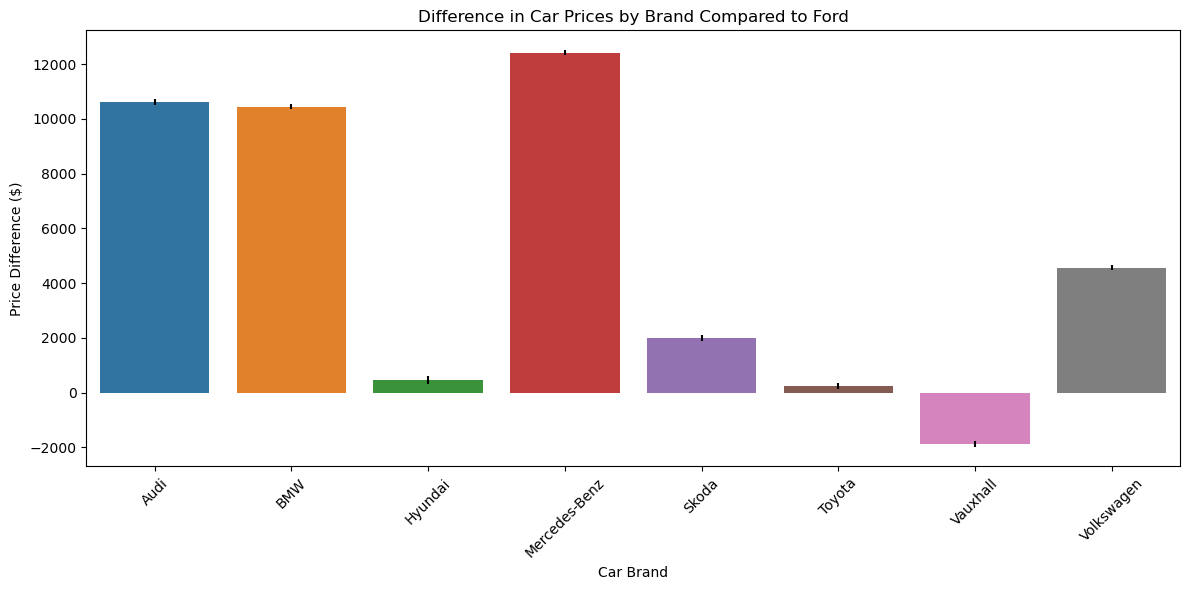

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Coefficients and their standard errors
brands =  predictors_from_dummies # Include all brands
coefficients_y  = coefficients# previously created in the OLS model and .tolist. [const_value, audi_coef, bmw_coef, ...]
errors = std_errors[-(len(std_errors)-1):]  # Standard errors for coefficients
print(errors)

# Convert to DataFrame
df_plot = pd.DataFrame({'Brand': brands, 'Coefficient': coefficients_y, 'Std_Error': errors})
df_plot.to_csv('./data/chart_data/Brand_price_bar_chart_data_with_errors.csv', index=False)
df_plot.info()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Coefficient', data=df_plot, yerr=errors, capsize=10)

plt.title("Difference in Car Prices by Brand Compared to Ford")
plt.ylabel("Price Difference ($)")
plt.xlabel("Car Brand")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()